In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

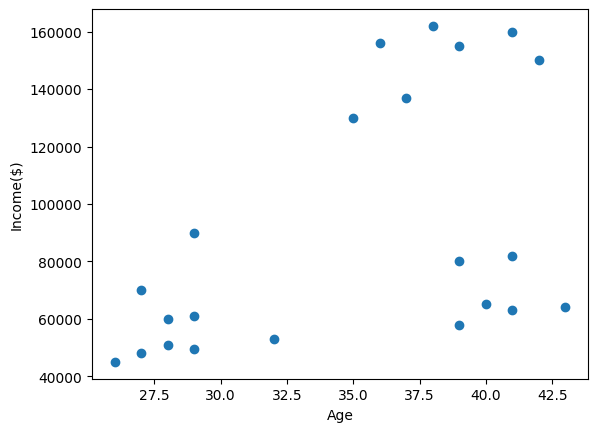

In [7]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")


In [8]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [9]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'Income($)')

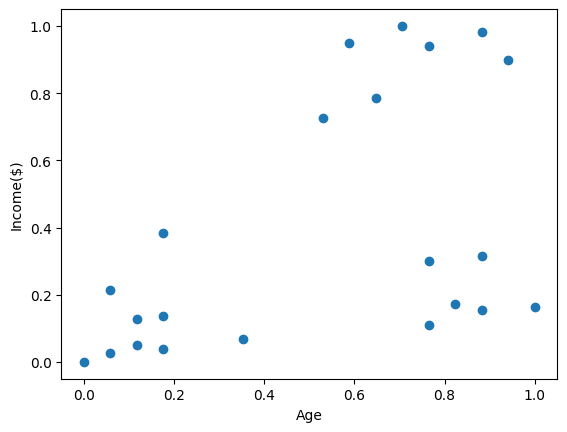

In [10]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")


In [11]:
# to see which k value is the best based on elbow rule

sse = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit_predict(df[['Age','Income($)']])
    sse.append(model.inertia_)




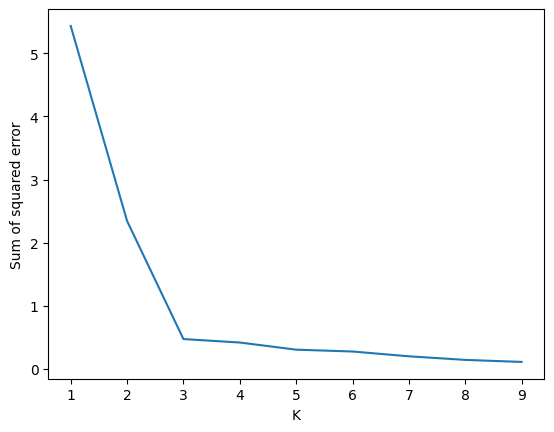

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

In [13]:
# So the best K value is 3

model = KMeans(n_clusters=3)
y_pred = model.fit_predict(df[['Age','Income($)']])
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


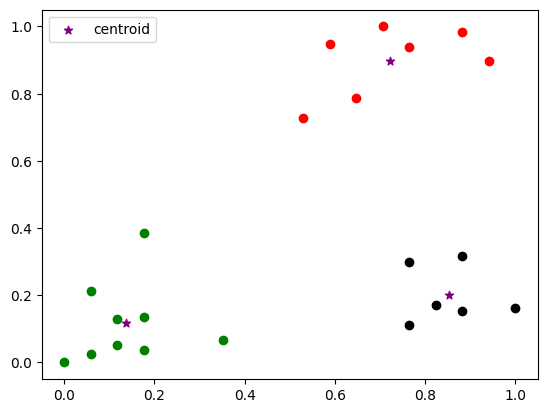

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()